In [2]:
import requests
import pandas as pd


BASE_URL = "https://api.nb.no/ngram/db2"
BASE_URL1 = "https://api.nb.no/ngram/db1"

pd.options.display.max_rows = 100

In [224]:
def ngram_book(word = '.', title = None, period = None, publisher = None, lang=None, city = None, ddk = None, topic = None):
    params = locals()
    params = {x:params[x] for x in params if not params[x] is None}
    r = requests.post(BASE_URL1 + "/ngram_book", json = params)
    df = pd.DataFrame.from_dict(r.json(), orient = 'index', columns =[word])
    df.index = df.index.map(pd.Timestamp)
    return df

def ngram_news(word = '.', title = None, period = None):
    """ get a time series"""
    params = locals()
    params = {x:params[x] for x in params if not params[x] is None}
    r = requests.post(BASE_URL1 + "/ngram_newspapers", json = params)
    df = pd.DataFrame.from_dict(r.json(), orient = 'index', columns =[word])
    df.index = df.index.map(pd.Timestamp)
    return df


In [56]:
period = (1950, 2021)
ddk = "839%"

In [225]:
punkts = pd.DataFrame(pd.concat([ngram_book(word = x, period = period) for x in ". ,".split()], axis = 1).sum(axis = 1), columns = ['freq'])
lik = ngram_book( word = 'likestilling', period = period)

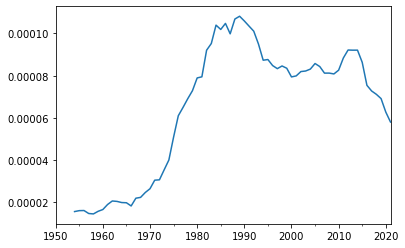

In [226]:
(lik.likestilling/punkts.freq).rolling(window = 5).mean().plot()

In [227]:
p = (19450101, 19451010)
punktsn = pd.DataFrame(pd.concat([ngram_news(word = x, period = p) for x in ". ,".split()], axis = 1).sum(axis = 1), columns = ['freq'])
likn = ngram_news( word = 'krigen',period = p)

In [228]:
likn

,krigen
1945-01-02,512
1945-01-03,450
1945-01-04,269
1945-01-05,318
1945-01-06,343
...,...
1945-10-05,1569
1945-10-06,1740
1945-10-08,912
1945-10-09,1104


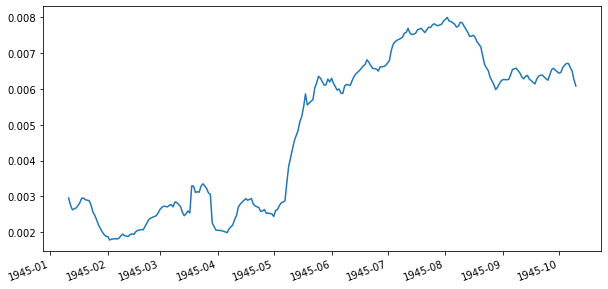

In [229]:
(likn[likn.columns[0]]/punktsn.freq).rolling(window = 10).mean().plot(rot = 20, figsize = (10,5))

In [165]:
%%time
(pd.DataFrame(pd.concat([ngram_book(word = w, period = (2015, 2021)) for w in ". og i".split()], axis = 1).sum(axis = 1), columns = ['antall bøker'])/5000).applymap(int).loc[::-1]

Wall time: 588 ms


,antall bøker
2021,493
2020,2544
2019,3498
2018,4498
2017,5956
2016,6995
2015,9998


In [172]:
%%time
(pd.DataFrame(pd.concat([ngram_news(word = w, period = (2015, 2016)) for w in ". og i".split()], axis = 1).sum(axis = 1), columns = ['antall aviser'])/5000).applymap(int).loc[::-1]

Wall time: 919 ms


,antall aviser
2016,19428
2015,20770
